In [1]:
using Pkg
Pkg.add("Distributions")

    Updating registry at `/srv/julia/pkg/registries/General.toml`
   Resolving package versions...
┌ Warning: The active manifest file at `/home/jovyan/Manifest.toml` has an old format that is being maintained.
│ To update to the new format run `Pkg.upgrade_manifest()` which will upgrade the format without re-resolving.
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.7/Pkg/src/manifest.jl:287
    Updating `~/Project.toml`
  [31c24e10] + Distributions v0.24.18
  No Changes to `~/Manifest.toml`
┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ nothing /home/jovyan/Manifest.toml:0


In [2]:
using Pkg
Pkg.add("Plots")


   Resolving package versions...
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed GR_jll ─────────────────────── v0.64.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed EarCut_jll ─────────────────── v2.2.3+0
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed PlotUtils ──────────────────── v1.2.0
   Installed RecipesPipeline ────────────── v0.4.1
   Installed Fontconfig_jll ─────────────── v2.13.93+0
   Installed Xorg_libxkbfile_jll ────────── v1.1.0+4
   Installed Libgpg_error_jll ───────────── v1.42.0+0
   Installed Xorg_xcb_util_jll ──────────── v0.4.0+1
   Installed

In [3]:
using Distributions
using Plots

In [4]:
############## QUESTION 1 ##################

########## FUNCTION TO CREATE POISSON SAMPLE ###########
function poissonProbabilityDistrib(randval, lambda) # INPUTS LAMBDA AND A RANDOM VALUE BETWEEN (0, 1)
    prob_at_i = 0 # CDF
    temp_pmfs = exp(-lambda) # PMF AT EACH iTH INDEX
    i = 0 # INDEX
    flag = 0 # wHEN SAMPLE IS FOUND
    while flag == 0
        i = i + 1
        prob_at_i = prob_at_i + temp_pmfs # MODIFY THE CDF
        if (randval < prob_at_i) # IF FOUND
            i = i - 1
            flag = 1 # TO BREAK THE LOOP
            return i
        end
        temp_pmfs = temp_pmfs*(lambda^i)/i/(lambda^(i-1)) # MODIFY THE PMF
    end
    return i
end

poissonProbabilityDistrib (generic function with 1 method)

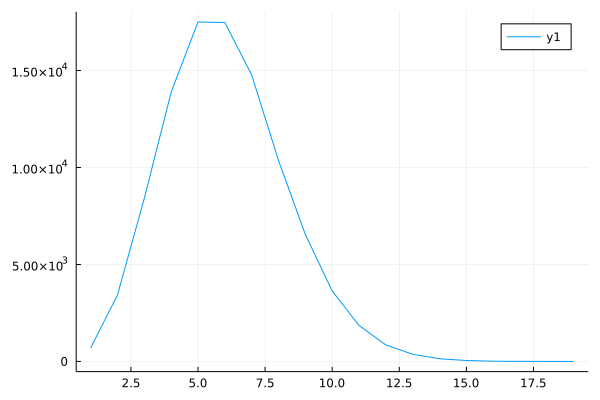

In [5]:
using Distributions
using Plots

vector = Array{Int,1}(undef, 100000)
max = 0
for i in 1:100000
    # RUN EXPERIMENT 100,000 TIMES
    randval = rand(Uniform(0,1))
    vector[i] = poissonProbabilityDistrib(randval, 5) # GET POISSON SAMPLE
    if vector[i] > max
        max = vector[i] # ADD TO VECTOR ARRAY
    end
end

pltvect = [0 for i in 0:max]

for i in 1:100000
    pltvect[vector[i]+1] = pltvect[vector[i]+1] + 1 # USE SEPERATE ARRAY TO STORE THE FREQUENCIES OF OCCURANCES
end


plot(pltvect) # PLOT

In [7]:
function acceptRejectSampler(n, p)
    low_mean = Int(floor(n*p))
    high_mean = Int(ceil(n*p))
    low_pmf = binomial(n, low_mean)*(p^low_mean)*((1-p)^(n - low_mean))
    high_pmf = binomial(n, high_mean)*(p^high_mean)*((1-p)^(n - high_mean))
    ## ASSUMING MAX PMF WILL BE NEAR MEAN
    if (low_pmf > high_pmf)
        max_pmf = low_pmf
    else
        max_pmf = high_pmf
    end
    
    accept = 0
    
    proposal = 0
    
    while accept == 0
        ratio = rand(Uniform(0, max_pmf))
        proposal = rand(Poisson(n))
        check_val = binomial(n, proposal)*(p^proposal)*((1-p)^(n - proposal))
        if (ratio < check_val)
            accept = 1
        end
    end
    return proposal
end

## self method, felt more efficient ##
###### ALGORITHM INFERED FROM YOUTUBE VIDEO: https://youtu.be/kYWHfgkRc9s ######

acceptRejectSampler (generic function with 1 method)

In [8]:
function acceptReject(n, p)
    low_mean = Int(floor(n*p))
    high_mean = Int(ceil(n*p))
    low_pmf = binomial(n, low_mean)*(p^low_mean)*((1-p)^(n - low_mean))
    high_pmf = binomial(n, high_mean)*(p^high_mean)*((1-p)^(n - high_mean))
    
    binom = Binomial(n, p)
    pois = Poisson(n)
    
    if (low_pmf > high_pmf)
        max_pmf = low_pmf
    else
        max_pmf = high_pmf
    end

    accept = 0
    proposal = 0
    
    while accept == 0
        u = rand(Uniform(0, 1))
        pois_val = rand(Poisson(n))
        num = pdf(binom, pois_val)
        denom = pdf(pois, pois_val)
        if (u < num/(denom*max_pmf))
            accept = 1
            proposal = pois_val
        end
        
    end
    return proposal
end

###### ALGORITHM USED FROM UNDERSTANDING OF LECTURE NOTES ######

acceptReject (generic function with 1 method)

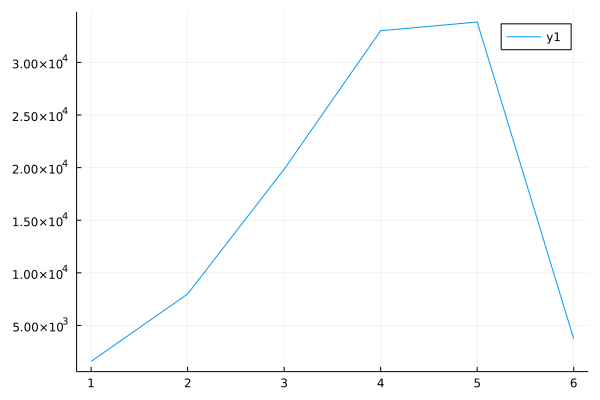

In [11]:
vector = Array{Int,1}(undef, 100000)
max = 0
for i in 1:100000
    vector[i] = acceptReject(5, 0.35) # store all accepted values in vector
    if vector[i] > max
        max = vector[i] # store max returned value
    end
end

pltvect = [0 for i in 0:max] # create a vector to store occurances of each value from 0-max

for i in 1:100000
    pltvect[vector[i]+1] = pltvect[vector[i]+1] + 1
end


plot(pltvect) # plot the distribution

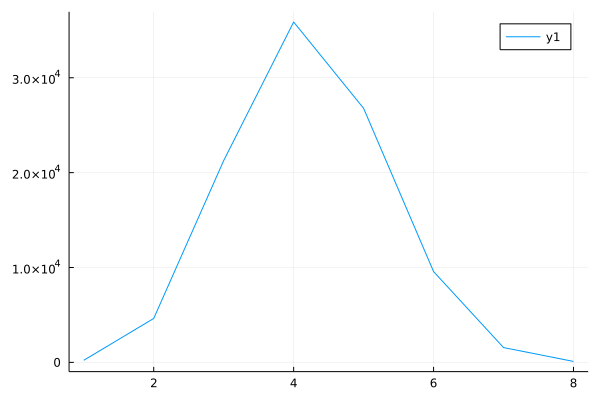

In [10]:
vector = Array{Int,1}(undef, 100000)
max = 0
for i in 1:100000
    vector[i] = acceptRejectSampler(7, 0.3) # USING DIFFERENT ALGORITHM
    if vector[i] > max
        max = vector[i] # store max returned value
    end
end

pltvect = [0 for i in 0:max] # create a vector to store occurances of each value from 0-max

for i in 1:100000
    pltvect[vector[i]+1] = pltvect[vector[i]+1] + 1
end


plot(pltvect) # plot the distribution